In [ ]:
import pandas as pd

customers = pd.read_csv('Olist_Data/olist_customers_dataset.csv')
geolocation = pd.read_csv('Olist_Data/olist_geolocation_dataset.csv')
items = pd.read_csv('Olist_Data/olist_order_items_dataset.csv')
payments = pd.read_csv('Olist_Data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('Olist_Data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('Olist_Data/olist_orders_dataset.csv')
products = pd.read_csv('Olist_Data/olist_products_dataset.csv')
sellers = pd.read_csv('Olist_Data/olist_sellers_dataset.csv')
category = pd.read_csv('Olist_Data/product_category_name_translation.csv')

In [3]:

import pandas as pd

base_path = "."

customers = pd.read_csv(f"{base_path}/olist_customers_dataset.csv")
geolocation = pd.read_csv(f"{base_path}/olist_geolocation_dataset.csv")
order_items = pd.read_csv(f"{base_path}/olist_order_items_dataset.csv")
order_payments = pd.read_csv(f"{base_path}/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(f"{base_path}/olist_order_reviews_dataset.csv")
orders = pd.read_csv(f"{base_path}/olist_orders_dataset.csv")
products = pd.read_csv(f"{base_path}/olist_products_dataset.csv")
sellers = pd.read_csv(f"{base_path}/olist_sellers_dataset.csv")
category_translation = pd.read_csv(f"{base_path}/product_category_name_translation.csv")

print(" All datasets loaded successfully!")
print(f"Orders shape: {orders.shape}")
print(f"Payments shape: {order_payments.shape}")
print(f"Customers shape: {customers.shape}")


✅ All datasets loaded successfully!
Orders shape: (99441, 8)
Payments shape: (103886, 5)
Customers shape: (99441, 5)


Business Question 1: How much did each customer spend on Olist over these 2 years?
Who are the “high-value” customers by sales amount? Where do these customers live?

In [6]:
# A. Merge orders and payments datasets
cust_spend = orders.merge(order_payments, on="order_id", how="left")

# B. Calculate total spending for each customer (sum of payment_value)
cust_total = (
    cust_spend.groupby("customer_id")["payment_value"]
    .sum()
    .reset_index(name="total_spent")
)

# C. Merge total spending info with customer dataset (to get city & state)
cust_total = cust_total.merge(
    customers[["customer_id", "customer_city", "customer_state"]],
    on="customer_id",
    how="left"
)

# D. Sort by total spending (descending) and select top 20 customers
top20_customers = cust_total.sort_values("total_spent", ascending=False).head(20)

# Display results
print("Top 20 High-Value Customers:")
display(top20_customers)

#summary by state (to see where they live)
state_summary = top20_customers["customer_state"].value_counts().reset_index()
state_summary.columns = ["state", "num_customers"]
print("\nState summary of top 20 customers:")
display(state_summary)

Top 20 High-Value Customers:


,customer_id,total_spent,customer_city,customer_state
8546,1617b1357756262bfa56ab541c47bc16,13664.08,rio de janeiro,RJ
91985,ec5b2ba62e574342386871631fafd3fc,7274.88,vila velha,ES
77522,c6e2731c5b391845f6800c97401a43a9,6929.31,campo grande,MS
95124,f48d464a0baaea338cb25f816991ab1f,6922.21,vitoria,ES
24771,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,marilia,SP
2065,05455dfa7cd02f13d132aa7a6a9729c6,6081.54,divinopolis,MG
86908,df55c14d1476a9a3467f131269c2477f,4950.34,araruama,RJ
87397,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,goiania,GO
14282,24bbf5fd2f2e1b359ee7de94defc4a15,4764.34,maua,SP
23932,3d979689f636322c62418b6346b1c6d2,4681.78,joao pessoa,PB



State summary of top 20 customers:


,state,num_customers
0,SP,5
1,RJ,4
2,MG,4
3,ES,2
4,MS,1
5,GO,1
6,PB,1
7,DF,1
8,PA,1


Most high-value customers on Olist spent between R$5,000 and R$10,000 over the two-year period, making multiple purchases across different orders.
These top spenders are primarily concentrated in Brazil’s Southeast region—especially in São Paulo (SP) and Rio de Janeiro (RJ)—which are the country’s largest and wealthiest markets.

In [7]:
# A. Calculate total revenue per seller (sum of prices from order_items)
seller_revenue = (
    order_items.groupby("seller_id")["price"]
    .sum()
    .reset_index(name="total_revenue")
)

# B. Merge with sellers dataset to add location information
seller_revenue = seller_revenue.merge(
    sellers[["seller_id", "seller_city", "seller_state"]],
    on="seller_id",
    how="left"
)

# C. Sort by revenue and get top 20 high-earning sellers
top20_sellers = seller_revenue.sort_values("total_revenue", ascending=False).head(20)

# Display results
print("Top 20 High-Earning Sellers:")
display(top20_sellers)

# summary by state (to see where they are located)
state_summary = (
    top20_sellers["seller_state"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "state", "seller_state": "num_sellers"})
)
print("\nState summary of top 20 sellers:")
display(state_summary)

Top 20 High-Earning Sellers:


,seller_id,total_revenue,seller_city,seller_state
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,guariba,SP
1013,53243585a1d6dc2643021fd1853d8905,222776.05,lauro de freitas,BA
881,4a3ca9315b744ce9f8e9374361493884,200472.92,ibitinga,SP
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03,sumare,SP
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89,itaquaquecetuba,SP
1560,7e93a43ef30c4f03f38b393420bc753a,176431.87,barueri,SP
2643,da8622b14eb17ae2831f4ac5b9dab84a,160236.57,piracicaba,SP
1505,7a67c85e85bb2ce8582c35f2203ad736,141745.53,sao paulo,SP
192,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55,sao paulo,SP
1824,955fee9216a65b617aa5c0531780ce60,135171.70,sao paulo,SP



State summary of top 20 sellers:


,num_sellers,count
0,SP,15
1,RJ,3
2,BA,1
3,MG,1


In [8]:
# A. Count number of units sold per product (sales volume)
prod_quantity = (
    order_items.groupby("product_id")
    .size()
    .reset_index(name="units_sold")
)

# B. Calculate total sales amount per product (revenue)
prod_revenue = (
    order_items.groupby("product_id")["price"]
    .sum()
    .reset_index(name="total_sales")
)

# C. Identify highest-performing items (top 10 by quantity OR revenue)

# i. Top 10 by quantity
top_qty = prod_quantity.sort_values("units_sold", ascending=False).head(10)

# ii. Top 10 by revenue
top_rev = prod_revenue.sort_values("total_sales", ascending=False).head(10)

# iii. Merge Top 10 by quantity and revenue (union, remove duplicates)
highperf = pd.merge(top_qty, top_rev, on="product_id", how="outer")

# D. Lookup product categories (Portuguese + English)
# Merge with products to get Portuguese category name
highperf = highperf.merge(
    products[["product_id", "product_category_name"]],
    on="product_id",
    how="left"
)

# Merge with translation dataset to get English category name
highperf = highperf.merge(
    category_translation,
    on="product_category_name",
    how="left"
)

# Rename for clarity
highperf.rename(
    columns={
        "product_category_name": "category_portuguese",
        "product_category_name_english": "category_english"
    },
    inplace=True
)

# Display results
print("Top 10 High-Performing Products (by quantity or revenue):")
display(highperf)

Top 10 High-Performing Products (by quantity or revenue):


,product_id,units_sold,total_sales,category_portuguese,category_english
0,154e7e31ebfa092203795c972e5804a6,281.0,NaN,beleza_saude,health_beauty
1,25c38557cf793876c5abdd5931f922db,NaN,38907.32,bebes,baby
2,368c6c730842d78016ad823897a372db,388.0,NaN,ferramentas_jardim,garden_tools
3,389d119b48cf3043d311335e499d9c6b,392.0,NaN,ferramentas_jardim,garden_tools
4,3dd2a17168ec895c781a9191c1e95ad7,274.0,41082.60,informatica_acessorios,computers_accessories
5,422879e10f46682990de24d770e7f83d,484.0,NaN,ferramentas_jardim,garden_tools
6,53759a2ecddad2bb87a079a1f1519f73,373.0,NaN,ferramentas_jardim,garden_tools
7,53b36df67ebb7c41585e8d54d6772e08,323.0,37683.42,relogios_presentes,watches_gifts
8,5f504b3a1c75b73d6151be81eb05bdc9,NaN,37733.90,cool_stuff,cool_stuff
9,6cdd53843498f92890544667809f1595,NaN,54730.20,beleza_saude,health_beauty


The products with the highest sales volumes and revenues are mainly in the garden_tools, health_beauty, and computers_accessories categories.
This suggests that Olist’s top-performing items are practical household, personal care, and technology-related products that appeal to a wide range of customers.

<Figure size 1000x600 with 0 Axes>

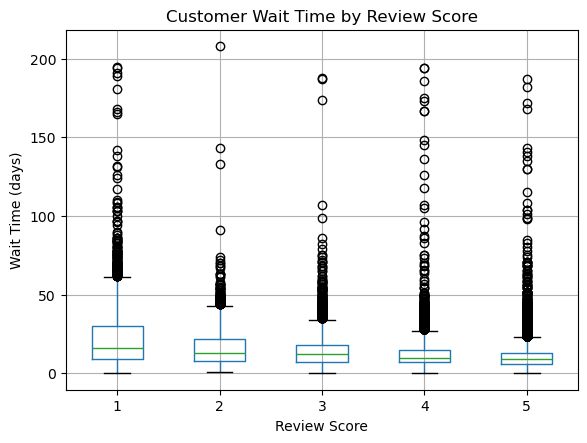

Standard deviation (1-star): 16.06
Standard deviation (5-star): 6.82

Two-Sample t-Test (1-star vs 5-star):
t-statistic = 63.247
p-value = 0.00000


In [10]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# 1) Calculate the customer's wait time in days
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

# Create wait_time column
orders["wait_time_days"] = (
    orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]
).dt.days

# 2) Merge reviews into orders dataset
orders_reviews = orders.merge(order_reviews, on="order_id", how="inner")

# 3) Create boxplot of wait time by review score
plt.figure(figsize=(10,6))
orders_reviews.boxplot(column="wait_time_days", by="review_score")
plt.title("Customer Wait Time by Review Score")
plt.suptitle("")  # Remove automatic 'Boxplot grouped by...' title
plt.xlabel("Review Score")
plt.ylabel("Wait Time (days)")
plt.show()

# 4a) Check standard deviations for 1-star and 5-star reviews
std_1 = orders_reviews.loc[orders_reviews["review_score"] == 1, "wait_time_days"].std()
std_5 = orders_reviews.loc[orders_reviews["review_score"] == 5, "wait_time_days"].std()

print(f"Standard deviation (1-star): {std_1:.2f}")
print(f"Standard deviation (5-star): {std_5:.2f}")

# 4b) Conduct two-sample t-test with unequal variances
x = orders_reviews.loc[orders_reviews["review_score"] == 1, "wait_time_days"].dropna()
y = orders_reviews.loc[orders_reviews["review_score"] == 5, "wait_time_days"].dropna()

t_stat, p_val = ttest_ind(x, y, equal_var=False)

print("\nTwo-Sample t-Test (1-star vs 5-star):")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_val:.5f}")

Yes — customer reviews are influenced by delivery time.
Orders with longer wait times tend to receive lower review scores, and the t-test shows a significant difference (p < 0.05) between one-star and five-star reviews, confirming that slower deliveries lead to poorer customer satisfaction.